In [52]:
# 导入项目中所需的模块包
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# 数据概览

In [53]:
df = pd.read_excel("京东消费者分析数据.xlsx")
df.head()

,customer_id,product_id,action_date,action_id,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,vender_id,fans_number,vip_number,shop_register_date,shop_category,shop_score
0,976695,328360,2018-03-05 08:52:00,10633744,PageView,5.0,W,2017-06-17,6,3.0,LukFook,2959,Bracelet,2017-10-05,4322,1159,36596,2017-07-04,Jewellery Accessories,9.043610
1,395399,141632,2018-03-20 10:55:00,5472028,PageView,4.0,M,2018-01-21,6,5.0,illuma,4203,Milk Power,2015-06-12,3563,2411,65893,2013-08-08,Mother and Infant,9.537151
2,1068082,5924,2018-04-01 13:56:00,3853455,PageView,6.0,W,2012-08-13,1,4.0,Li-Ning,8002,Badminton,2013-06-14,1457,213610,357580,2013-05-23,Outdoor Sports,9.571139
3,1068082,10723,2018-04-01 13:45:00,3853455,PageView,6.0,W,2012-08-13,1,4.0,Li-Ning,8002,Badminton,2011-07-19,1457,213610,357580,2013-05-23,Outdoor Sports,9.571139
4,735392,4559,2018-02-06 20:25:00,9434940,PageView,6.0,M,2009-09-15,7,5.0,Other,6944,Cookie,2015-11-16,355,63969,85597,2014-10-31,Food,9.665680


#### 保留有效数据

In [54]:
df = df[['customer_id','product_id','shop_score']]
df.head()

,customer_id,product_id,shop_score
0,976695,328360,9.043610
1,395399,141632,9.537151
2,1068082,5924,9.571139
3,1068082,10723,9.571139
4,735392,4559,9.665680


In [55]:
# 查看数据类型
print('数据类型：')
print(df.dtypes,'\n')
print('数据大致信息：')
print(df.info())

数据类型：
customer_id      int64
product_id       int64
shop_score     float64
dtype: object 

数据大致信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183828 entries, 0 to 183827
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  183828 non-null  int64  
 1   product_id   183828 non-null  int64  
 2   shop_score   183828 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.2 MB
None


**查看平均值、最大值、最小值、标准差以及评分的四分位数**

In [56]:
df.describe()

,customer_id,product_id,shop_score
count,1.838280e+05,183828.000000,183828.000000
mean,8.019697e+05,189121.266042,5.716299
std,4.636870e+05,108643.057411,4.653295
min,1.700000e+01,11.000000,-1.000000
25%,4.010940e+05,95800.000000,0.000000
50%,7.990945e+05,187919.000000,9.311070
75%,1.204801e+06,283840.250000,9.539181
max,1.608703e+06,378421.000000,10.000000


**查看评分最低、最高评分**

In [57]:
print('最低评分：%d 分' %(df.shop_score.min()))
print('最高评分：%d 分' %(df.shop_score.max()))

最低评分：-1 分
最高评分：10 分


**数据统计**

In [58]:
print('数据统计：\n')

print('用户总数：',len(np.unique(df.customer_id)))    # unique()函数保证数据唯一性
print('商品总数：',len(np.unique(df.product_id)))
print('评分总数：',df.shape[0])

数据统计：

用户总数： 140715
商品总数： 52950
评分总数： 183828


# 数据预处理

**查看各字段的缺失情况**

In [59]:
print('各字段的缺失值数量情况',df.isnull().sum())

各字段的缺失值数量情况 customer_id    0
product_id     0
shop_score     0
dtype: int64


**删除评分为零分和负分的数据**

In [60]:
df = df.drop(df[df['shop_score'] <= 0].index)
df.head()

,customer_id,product_id,shop_score
0,976695,328360,9.043610
1,395399,141632,9.537151
2,1068082,5924,9.571139
3,1068082,10723,9.571139
4,735392,4559,9.665680


# 数据可视化

**用户评分数**

In [61]:
# 每个用户的评分数量，降序排序

user_rate_nums = df.groupby(by='customer_id')['shop_score'].count().sort_values(ascending=False)
user_rate_nums.head()

customer_id
734657    54
795256    47
347732    38
84120     24
702441    23
Name: shop_score, dtype: int64

In [70]:
print('评价次数大于10的人数：{}个\n'.format(sum(user_rate_nums>=10)))

评价次数大于10的人数：124个



**筛选评分数量小于10的商品**

In [84]:
# 筛选掉评分数量小于 10 人次的商品
new_df = df.groupby('product_id').filter(lambda x:x['shop_score'].count()>=10)

**商品平均分**

In [85]:
new_df.groupby('product_id')['shop_score'].mean().sort_values(ascending=False).head()

product_id
202236    10.000000
362974    10.000000
97170     10.000000
28968     10.000000
157145     9.992476
Name: shop_score, dtype: float64

**商品评分数量**

In [86]:
product_rate_nums = new_df.groupby('product_id')['shop_score'].count().sort_values(ascending=False)
product_rate_nums

product_id
258625    395
152092    270
224207    256
19643     194
107331    187
         ... 
217015     10
216400     10
213311     10
213057     10
188978     10
Name: shop_score, Length: 1701, dtype: int64

### 商品评分数量分布

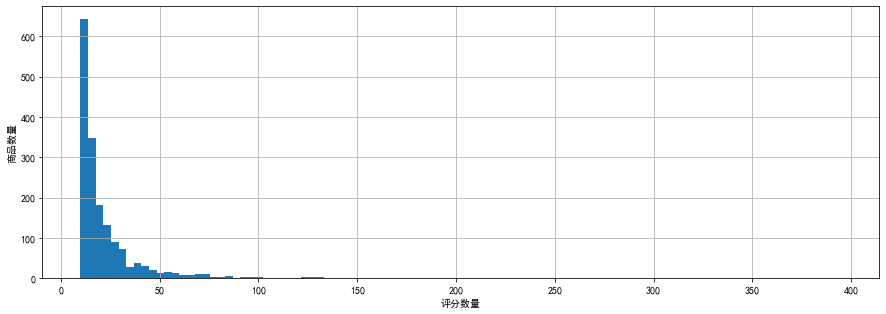

In [87]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）

plt.figure(figsize=(15,5))
pd.DataFrame(product_rate_nums)['shop_score'].hist(bins=100)

plt.xlabel('评分数量')
plt.ylabel('商品数量')
plt.show()

In [88]:
# 平均分 与 评分数量
ratings_mean_count = pd.DataFrame(new_df.groupby('product_id')['shop_score'].mean().sort_values(ascending=False))
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('product_id')['shop_score'].count())
ratings_mean_count.head()

,shop_score,rating_counts
product_id,,
202236,10.000000,10
362974,10.000000,23
97170,10.000000,10
28968,10.000000,11
157145,9.992476,10


### 各评分段的评分数量分布

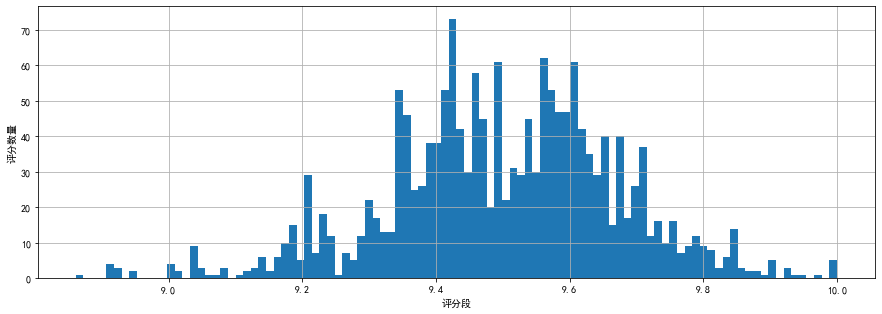

In [89]:
plt.figure(figsize=(15,5))
ratings_mean_count['shop_score'].hist(bins=100)

plt.xlabel('评分段')
plt.ylabel('评分数量')
plt.show()

# 利用基于矩阵分解的协同过滤算法实现商品推荐系统
#### 创建商品和用户的关系矩阵

In [90]:
ratings_matrix = new_df.pivot_table(values='shop_score', index='customer_id', columns='product_id', fill_value=0)
pd.DataFrame(ratings_matrix)    # 查看矩阵

product_id,445,710,814,1763,2461,2805,3686,3747,3883,4145,...,375630,375877,375884,375936,376041,376678,376970,377012,377622,378022
customer_id,,,,,,,,,,,,,,,,,,,,,
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1608596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1608629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
X = ratings_matrix.T    # 矩阵转置
pd.DataFrame(X)         # 查看转置后的矩阵

customer_id,22,24,64,109,177,198,211,260,374,386,...,1608377,1608387,1608399,1608424,1608540,1608555,1608596,1608629,1608659,1608703
product_id,,,,,,,,,,,,,,,,,,,,,
445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 矩阵分解

In [92]:
# 构建 SVD 模型，将特征数目组合为 10 个重要特征
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)    # 对矩阵进行转化
pd.DataFrame(decomposed_matrix)

,0,1,2,3,4,5,6,7,8,9
0,-3.953126e-08,-7.566903e-08,-2.581226e-08,9.178457e-07,-1.223781e-06,0.000003,0.000002,1.987483e-06,0.000003,-1.850557e-07
1,-1.754546e-07,3.994405e-07,-3.806913e-07,-1.180389e-06,-6.466530e-06,0.000012,-0.000008,-4.077442e-05,-0.000009,-4.249289e-06
2,-6.982683e-08,1.873879e-06,-9.284237e-06,1.203862e-05,-3.658703e-05,0.000035,-0.000084,3.191894e-07,-0.000002,-2.555854e-05
3,-1.632911e-06,2.299535e-05,4.788509e-06,7.877707e-05,-3.891629e-04,0.000201,-0.001692,8.902362e-03,0.001368,-1.718121e-03
4,1.125207e-02,9.248663e-05,1.383717e-03,1.174713e-03,-9.013441e-03,0.008295,-0.009416,-1.384160e-02,0.019145,7.845324e-03
...,...,...,...,...,...,...,...,...,...,...
1696,7.520158e-03,-9.021560e-04,2.184343e-02,1.335763e-03,1.147022e-02,-0.001884,-0.015480,-5.414553e-02,0.044828,1.108104e-02
1697,5.021619e-05,2.876786e-04,1.086212e-03,1.852852e-03,-4.744760e-03,0.004460,-0.007597,-1.001170e-02,-0.022711,1.016640e-02
1698,2.361364e-05,2.457506e-03,3.758510e-06,2.504596e-05,9.335487e-06,-0.000041,0.000036,-3.062100e-05,-0.000161,-1.443664e-04
1699,4.995100e-09,4.790193e-07,-3.327959e-07,5.454163e-06,-1.043297e-05,-0.000004,0.000051,-3.795658e-05,-0.000056,1.058089e-05


**构建相关系数矩阵，计算商品间的相关系数**

In [93]:
correlation_matrix = np.corrcoef(decomposed_matrix)
pd.DataFrame(correlation_matrix)

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,1.000000,-0.193173,0.233972,0.383155,0.218583,0.147057,0.717813,0.645768,0.540264,0.321767,...,-0.000450,-0.296194,0.148751,-0.024945,-0.154089,-0.155783,-0.513238,-0.263992,-0.301368,-0.425837
1,-0.193173,1.000000,0.212728,-0.828677,0.542257,-0.164419,0.039785,-0.501642,-0.010080,0.340503,...,-0.227599,0.229835,-0.582656,0.086106,-0.116966,0.608029,0.496223,0.163717,0.390152,-0.500134
2,0.233972,0.212728,1.000000,0.321053,0.452076,0.824339,0.222444,0.335311,-0.136821,0.789117,...,0.778970,0.127210,-0.354427,0.808779,-0.152898,0.068979,0.175769,0.120846,-0.553779,-0.246785
3,0.383155,-0.828677,0.321053,1.000000,-0.358132,0.636581,0.125116,0.765542,-0.072587,0.044670,...,0.649168,-0.157080,0.473791,0.386313,-0.125668,-0.623757,-0.415841,-0.080549,-0.630204,0.356342
4,0.218583,0.542257,0.452076,-0.358132,1.000000,-0.011577,0.516450,-0.099244,0.478887,0.796566,...,-0.069513,-0.018448,-0.710735,0.149610,0.196188,0.753462,-0.017599,-0.105086,-0.303244,-0.818315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,-0.155783,0.608029,0.068979,-0.623757,0.753462,-0.370484,0.415985,-0.295809,0.548964,0.504289,...,-0.360318,0.012119,-0.674784,0.019245,0.060942,1.000000,-0.100925,-0.082632,-0.171931,-0.757951
1697,-0.513238,0.496223,0.175769,-0.415841,-0.017599,0.214973,-0.776574,-0.725794,-0.813860,-0.010791,...,0.142024,0.168354,-0.344766,-0.020902,0.357857,-0.100925,1.000000,0.133657,0.558933,0.317377
1698,-0.263992,0.163717,0.120846,-0.080549,-0.105086,0.036873,-0.099691,-0.009162,-0.150797,-0.048336,...,0.228907,0.992288,0.098346,0.274942,-0.206886,-0.082632,0.133657,1.000000,0.102740,0.113391
1699,-0.301368,0.390152,-0.553779,-0.630204,-0.303244,-0.525247,-0.532863,-0.621051,-0.389732,-0.639305,...,-0.474066,0.096973,0.196898,-0.530639,0.054572,-0.171931,0.558933,0.102740,1.000000,0.342723


## 基于物品相似度实现推荐
**确定商品的唯一性**

In [94]:
i = X.index[20]    # 假设用户喜欢第 20 个商品
product_names = list(X.index)
product_ID = product_names.index(i)

**查看该商品在相似度矩阵中相似的商品**

In [95]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape[0]    # 相似商品数量

1701

#### 选出相关系数大于 0.8 的商品

In [96]:
Recommend = list(X.index[correlation_product_ID > 0.8])
Recommend.remove(i)    # 去除商品自身

#### 将相关系数排名前 5 的商品推荐给喜欢该商品的用户

In [97]:
Recommend_Products = pd.DataFrame(Recommend[0:5])
Recommend_Products.columns=['Product_ID']
Recommend_Products

,Product_ID
0,710
1,10006
2,17126
3,18295
4,20263
